In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import re

In [21]:
# reading list of employees (same format for both c.s. dept. and phys. dept.). Deleting unnecessary column and employee
# without any publication in scopus
title = 'ph_emps_scopus.csv'
emps = pd.read_csv(title).drop(columns="Unnamed: 0")
emps.drop(emps[emps["scopus_id"] == "None"].index, inplace=True)
emps.reset_index(drop=True, inplace=True)
emps["pubs"][0][:40]

"[['6701755717', '36459801500', '12544974"

In [22]:
# due to unfortunate formatting, collaboration lists are read as strings


pubs = []

for item in emps["pubs"]:
    # subbing ][ with ;
    sub = re.sub("\], \[+", ';',item)
    # deleting [, ] and '
    sub = re.sub("[\'\[\] ]+", '', sub)
    # splitting big string on ;
    sub = sub.split(';')
    # splitting strings inside lists on ,
    sub = [l.split(',') for l in sub]
    pubs.append(sub)
    
emps["pubs"] = pubs

6701755717,36459801500,12544974600;22734220500,57198306291,37089580300,24343295300,6603564121,6701755717,7006146512,7005880157;57210199150,6701755717;56651019500,36459801500,6701755717;54882407900,57192154118,36459801500,6701755717;56651019500,36459801500,54882407900,6701755717;56651019500,36459801500,6701755717;54415838400,36459801500,6701755717;54882407900,6701755717;57192154118,54882407900,6701755717;54780344900,12241080700,7102348456,8405703300,7005929919,7004689148,56034404500,7103360092,6701755717,7003271102;57160145800,6701755717;54413850300,36459801500,24290590600,57148255400,57147649500,57209680371,57196746287,35424248300,7006185423,14421216800,7801447994,6701755717,56016491400;54780344900,12241080700,7102348456,8405703300,7005929919,22035228900,7004689148,56034404500,7103360092,6701755717,7003271102;25627588400,6701755717;12792941300,52365464200,54416032400,7004912667,6701755717,14421216800;55868249700,6701755717;56651019500,36459801500,6701755717;55868249700,6701755717;12242

In [7]:
emps["scopus_id"][2]

'7003961190'

In [17]:
assc_list = []
emps_ids = set(emps["scopus_id"])

# creating list of coworkers for each employee

for i in emps.index:
    # for an employee create set of coworkers, so they do not repeat
    coworkers = set([emp for sublist in emps["pubs"][i] for emp in sublist])
    # remove a person from set of his (hers) coworkers
    coworkers.remove(emps["scopus_id"][i])
    # remove employees from outside of PWr
    assc_list.append([emp for emp in coworkers if emp in emps_ids])


In [18]:
list(emps["scopus_id"])

['6701755717',
 '7003815262',
 '7003961190',
 '6701680061',
 '6506010316',
 '7007035077',
 '12242263200',
 '6603257340',
 '36459801500',
 '54882407900',
 '54083167700',
 '26655749700',
 '55875008000',
 '54415838400',
 '6602823921',
 '56363096800',
 '55649571755',
 '35222272100',
 '55551276500',
 '22735444200',
 '13106271700',
 '57191189949',
 '57194544425',
 '57202507902',
 '55933022200',
 '56964185900',
 '57210199150',
 '56444404000',
 '57192154118',
 '57202804300',
 '56651019500',
 '57208597387',
 '6603896124',
 '57191831459',
 '55458070200',
 '25627989900',
 '6508322675',
 '6603565560',
 '56035399900',
 '6505911680',
 '16686364200']

In [19]:
# employees -> nodes, connections -> edges
nodes = list(emps["scopus_id"])
edges = []
for i,l in enumerate(assc_list):
    for person in l:
        edges.append((nodes[i], person))

In [20]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

/home/bartosz/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


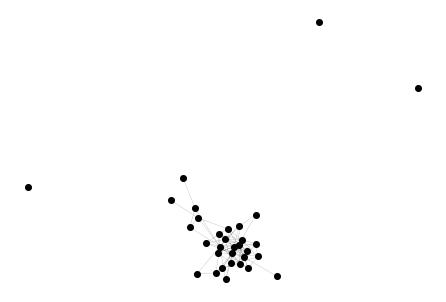

In [9]:
# options = {
#     'node_color': 'black',
#     'node_size': 50,
#     'line_color': 'grey',
#     'linewidths': 0,
#     'width': 0.1,
# }
# nx.draw(G, **options)
# plt.show()

In [21]:
from pyvis.network import Network

In [22]:
g = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

In [23]:
# creating a graph

for i,node in enumerate(nodes):
    # creating and adding names to nodes, so they do not show as numbers
    tit = emps["name"][i] + ' ' + emps["surname"][i]
    g.add_node(node, label=tit)
    
for edge in edges:
    g.add_edge(edge[0], edge[1])

In [24]:
# neighbor_map = g.get_adj_list()

# for node in cs_net.nodes:
#     node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
# #     node["value"] = len(neighbor_map[node["id"]])


# cs_net.set_options("""
# var options = {
#   "physics": {
#     "barnesHut": {
#       "springLength": 375,
#       "avoidOverlap": 0.87
#     },
#     "minVelocity": 0.75
#   }
# }
# """)
g.show_buttons(filter_=['physics'])
g.show("cs_emps.html")